[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02 already exists. Not creating.


ValueError: cannot reshape array of size 6 into shape (3,4)

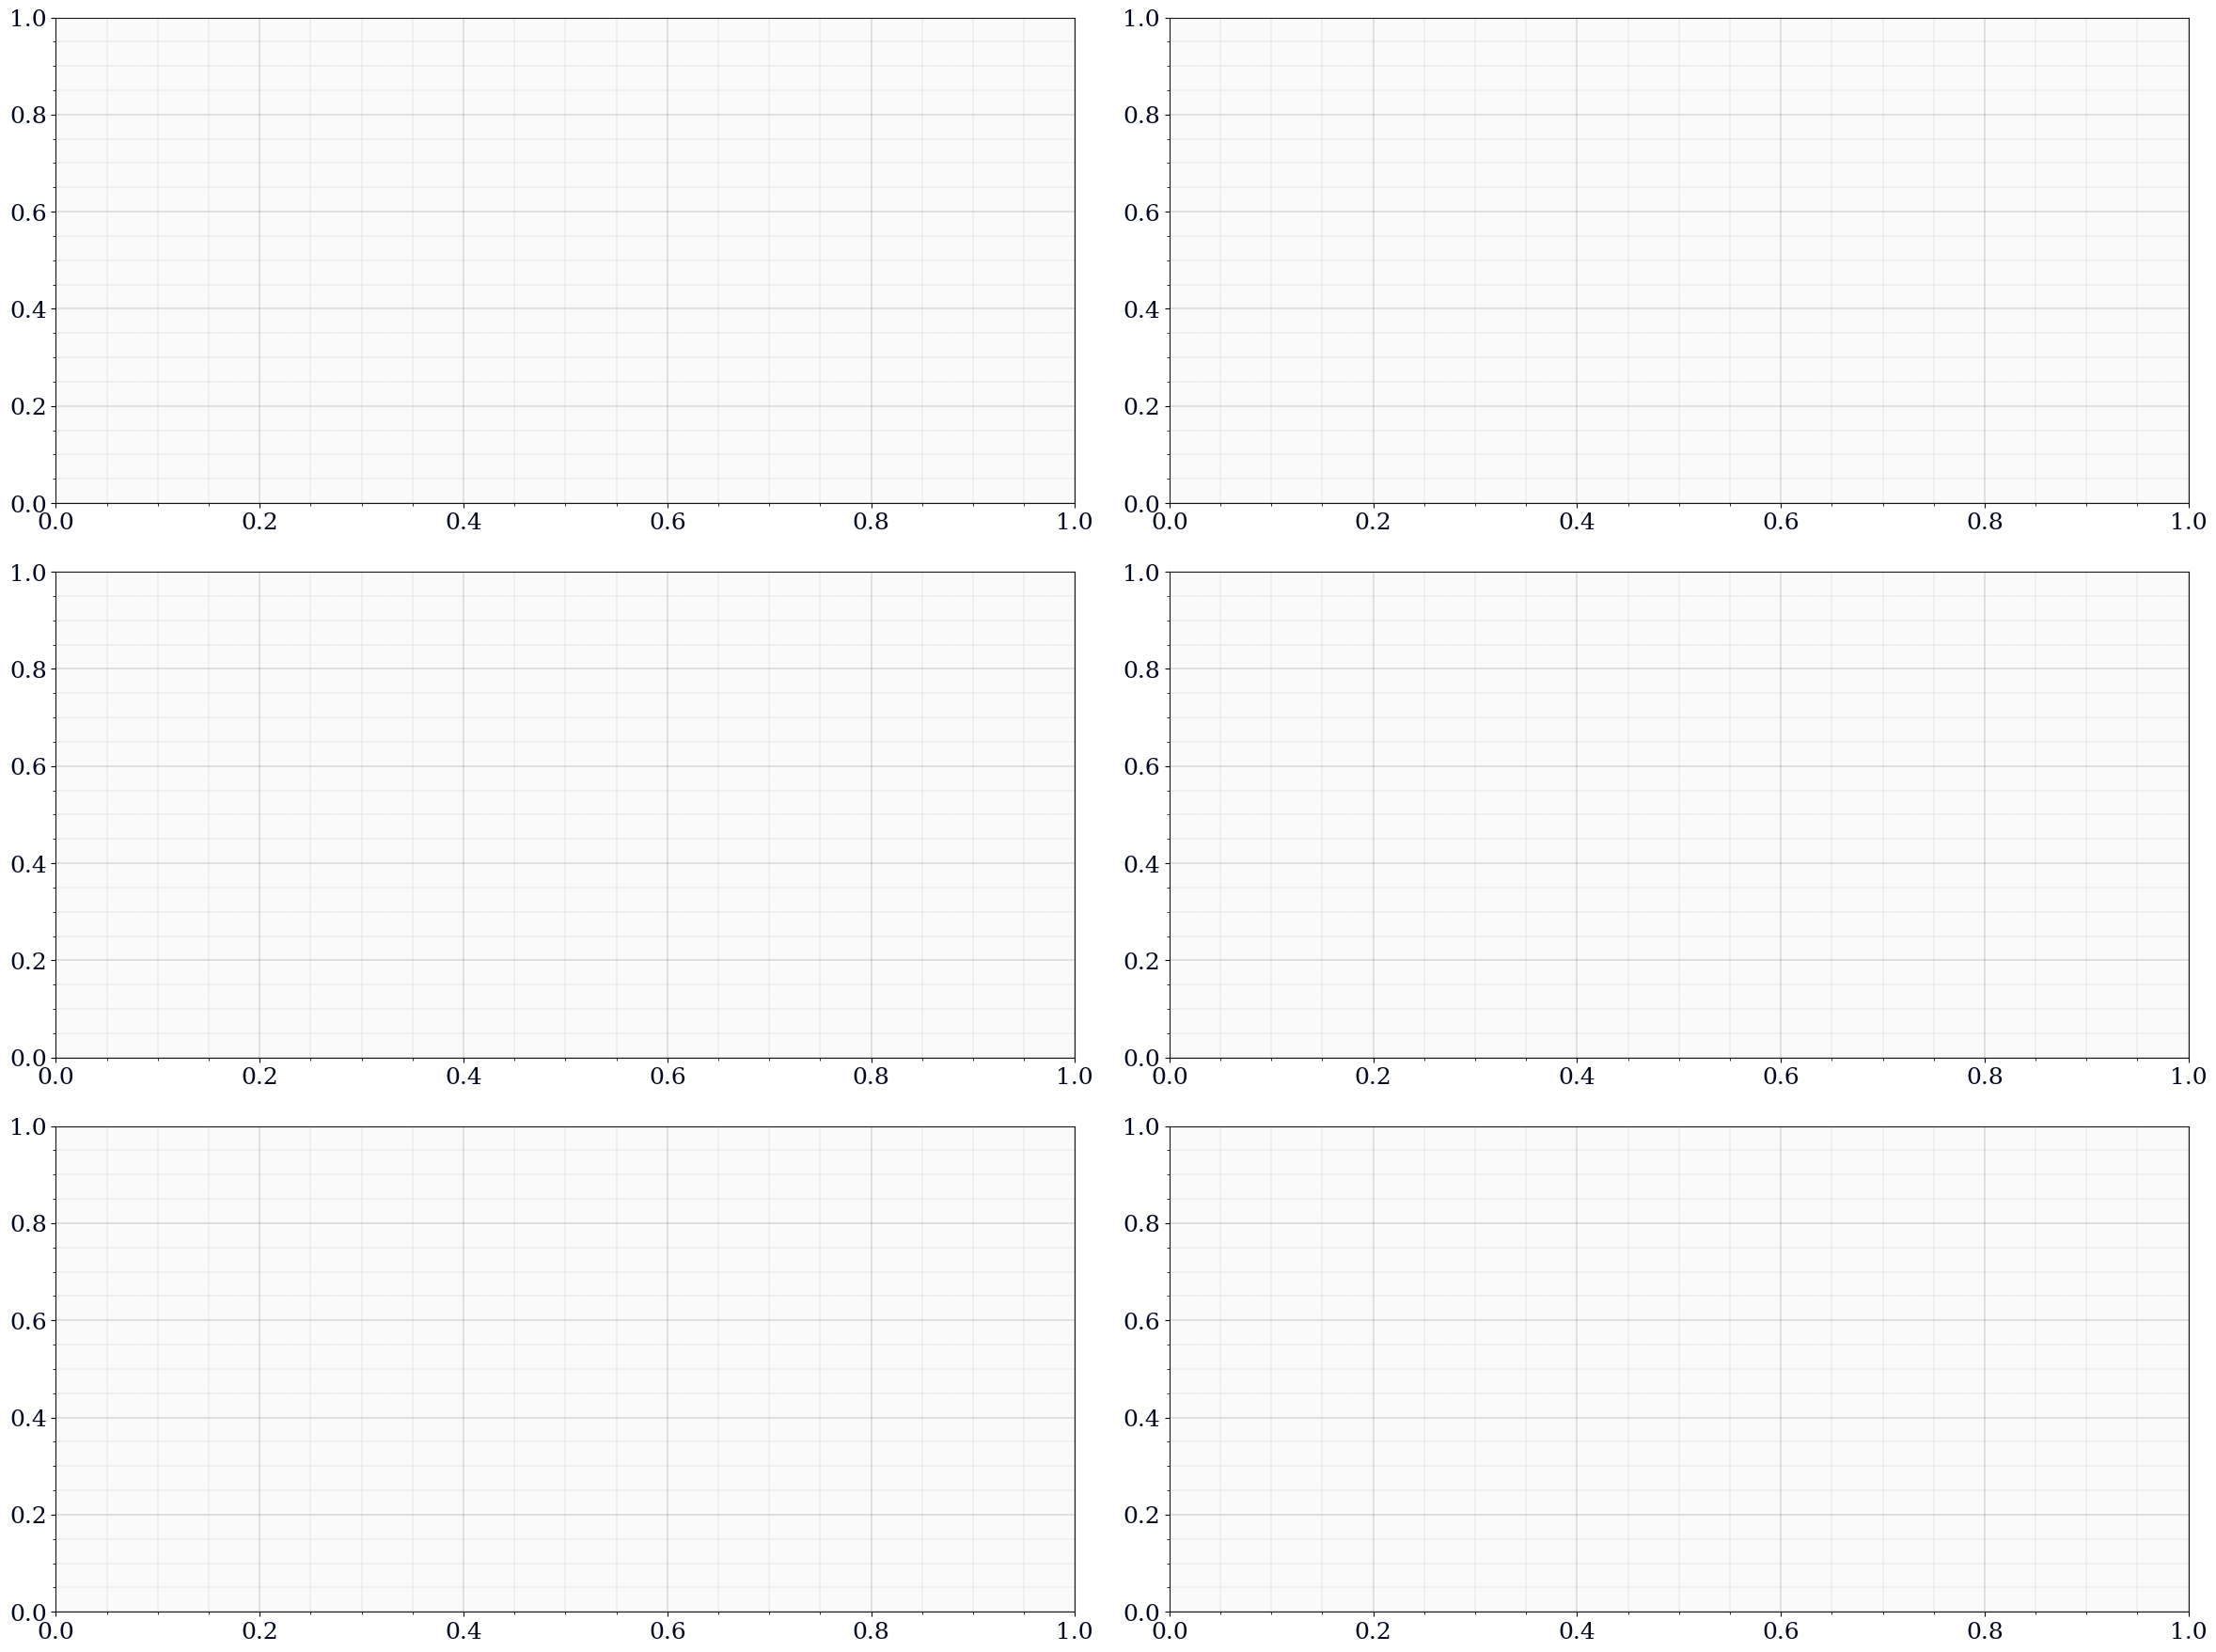

In [6]:
#!/usr/bin/env python

# Author: Rahul Bhadani

import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time

dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')

# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

bagfiles = []
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02.bag')
for bf in bagfiles:
    B = bagreader(bf)
    
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, 10):
            # print(i)
            cmdvel_file = B.message_by_topic('/catvehicle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/catvehicle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/catvehicle_{:03d}/odom'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
            # lead_dist_file = B.message_by_topic('/catvehicle_{:03d}/lead_dist'.format(i))
            # lead_distance = pd.read_csv(lead_dist_file)
            # lead_dist_b.append(lead_distance)
            
            # relvel_file = B.message_by_topic('/catvehicle_{:03d}/rel_vel'.format(i))
            # relvel = pd.read_csv(relvel_file)
            # relvel_b.append(relvel)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 4 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(ld):
        ax[j, 2].scatter(x = 'Time', y = 'data', data = ld[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 2].legend()
        ax[j, 2].set_xlabel('Time')
        ax[j, 2].set_ylabel('Space Gap [m]')
        ax[j, 2].set_title('Space Gap: Simulation {}'.format(j))

    for i, v in enumerate(rv):
        ax[j, 3].scatter(x = 'Time', y = 'linear.z', data = rv[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 3].legend()
        ax[j, 3].set_xlabel('Time')
        ax[j, 3].set_ylabel('Relative Velocity [m]')
        ax[j, 3].set_title('Relative Velocity: Simulation {}'.format(j))
        
fig.show()
#fig.savefig("persimulationplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

def scale_time(time_vector, scale = 2.0):
    """
    
    """
    if scale == 1.0:
        return time_vector
    diff = np.diff(time_vector)
    new_time = []
    new_time.append(time_vector[0])

    for i, d in enumerate(diff):
        t_next = new_time[i]  + d*scale
        new_time.append(t_next)

    return new_time

# overlaid plot
fig, ax = bagpy.create_fig(ncols = 2, nrows = 5)

p = [0]    
for k in range(1, len(cmd_speed)):
    p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
    p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    # print('Vehicle: {}'.format(j))
    p = [0, 34.0]
    #scale = [1.0, 2.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    lb = [  'Simulation 1: RTF=0.5 MaxupdateRate = 50.0, time_step = 0.01', \
            'Simulation 1: RTF=0.25 MaxupdateRate = 25.0, time_step = 0.01',\
            'Simulation 1: RTF=0.25 MaxupdateRate = 50.0, time_step = 0.005']
    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        #new_time = scale_time(time, scale[k])
        #cmd_speed[k][j]['Time'] = new_time
        #ax[j].scatter(x = cmd_speed[k][j]['Time'] , y = cmd_speed[k][j]['linear.x']  ,  s = 2, label = 'simulation#_{}'.format(k))
        ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) , y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
    
    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for CAT Vehicle {}'.format(j))
    fig.show()


# fig.savefig("ovelaidplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02 already exists. Not creating.


/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_catvehicle.py:105: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



[2021_10_23_21_43_43] (numexpr.utils) INFO: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2021_10_23_21_43_43] (numexpr.utils) INFO: NumExpr defaulting to 8 threads.
[2021_10_23_21_43_43] (root) INFO: Zero pass correlation coefficient  = (0.8079024923817414, 0.0)
[2021_10_23_21_45_04] (root) INFO: Zero pass correlation coefficient  = (0.8081030225588465, 0.0)


/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_catvehicle.py:154: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



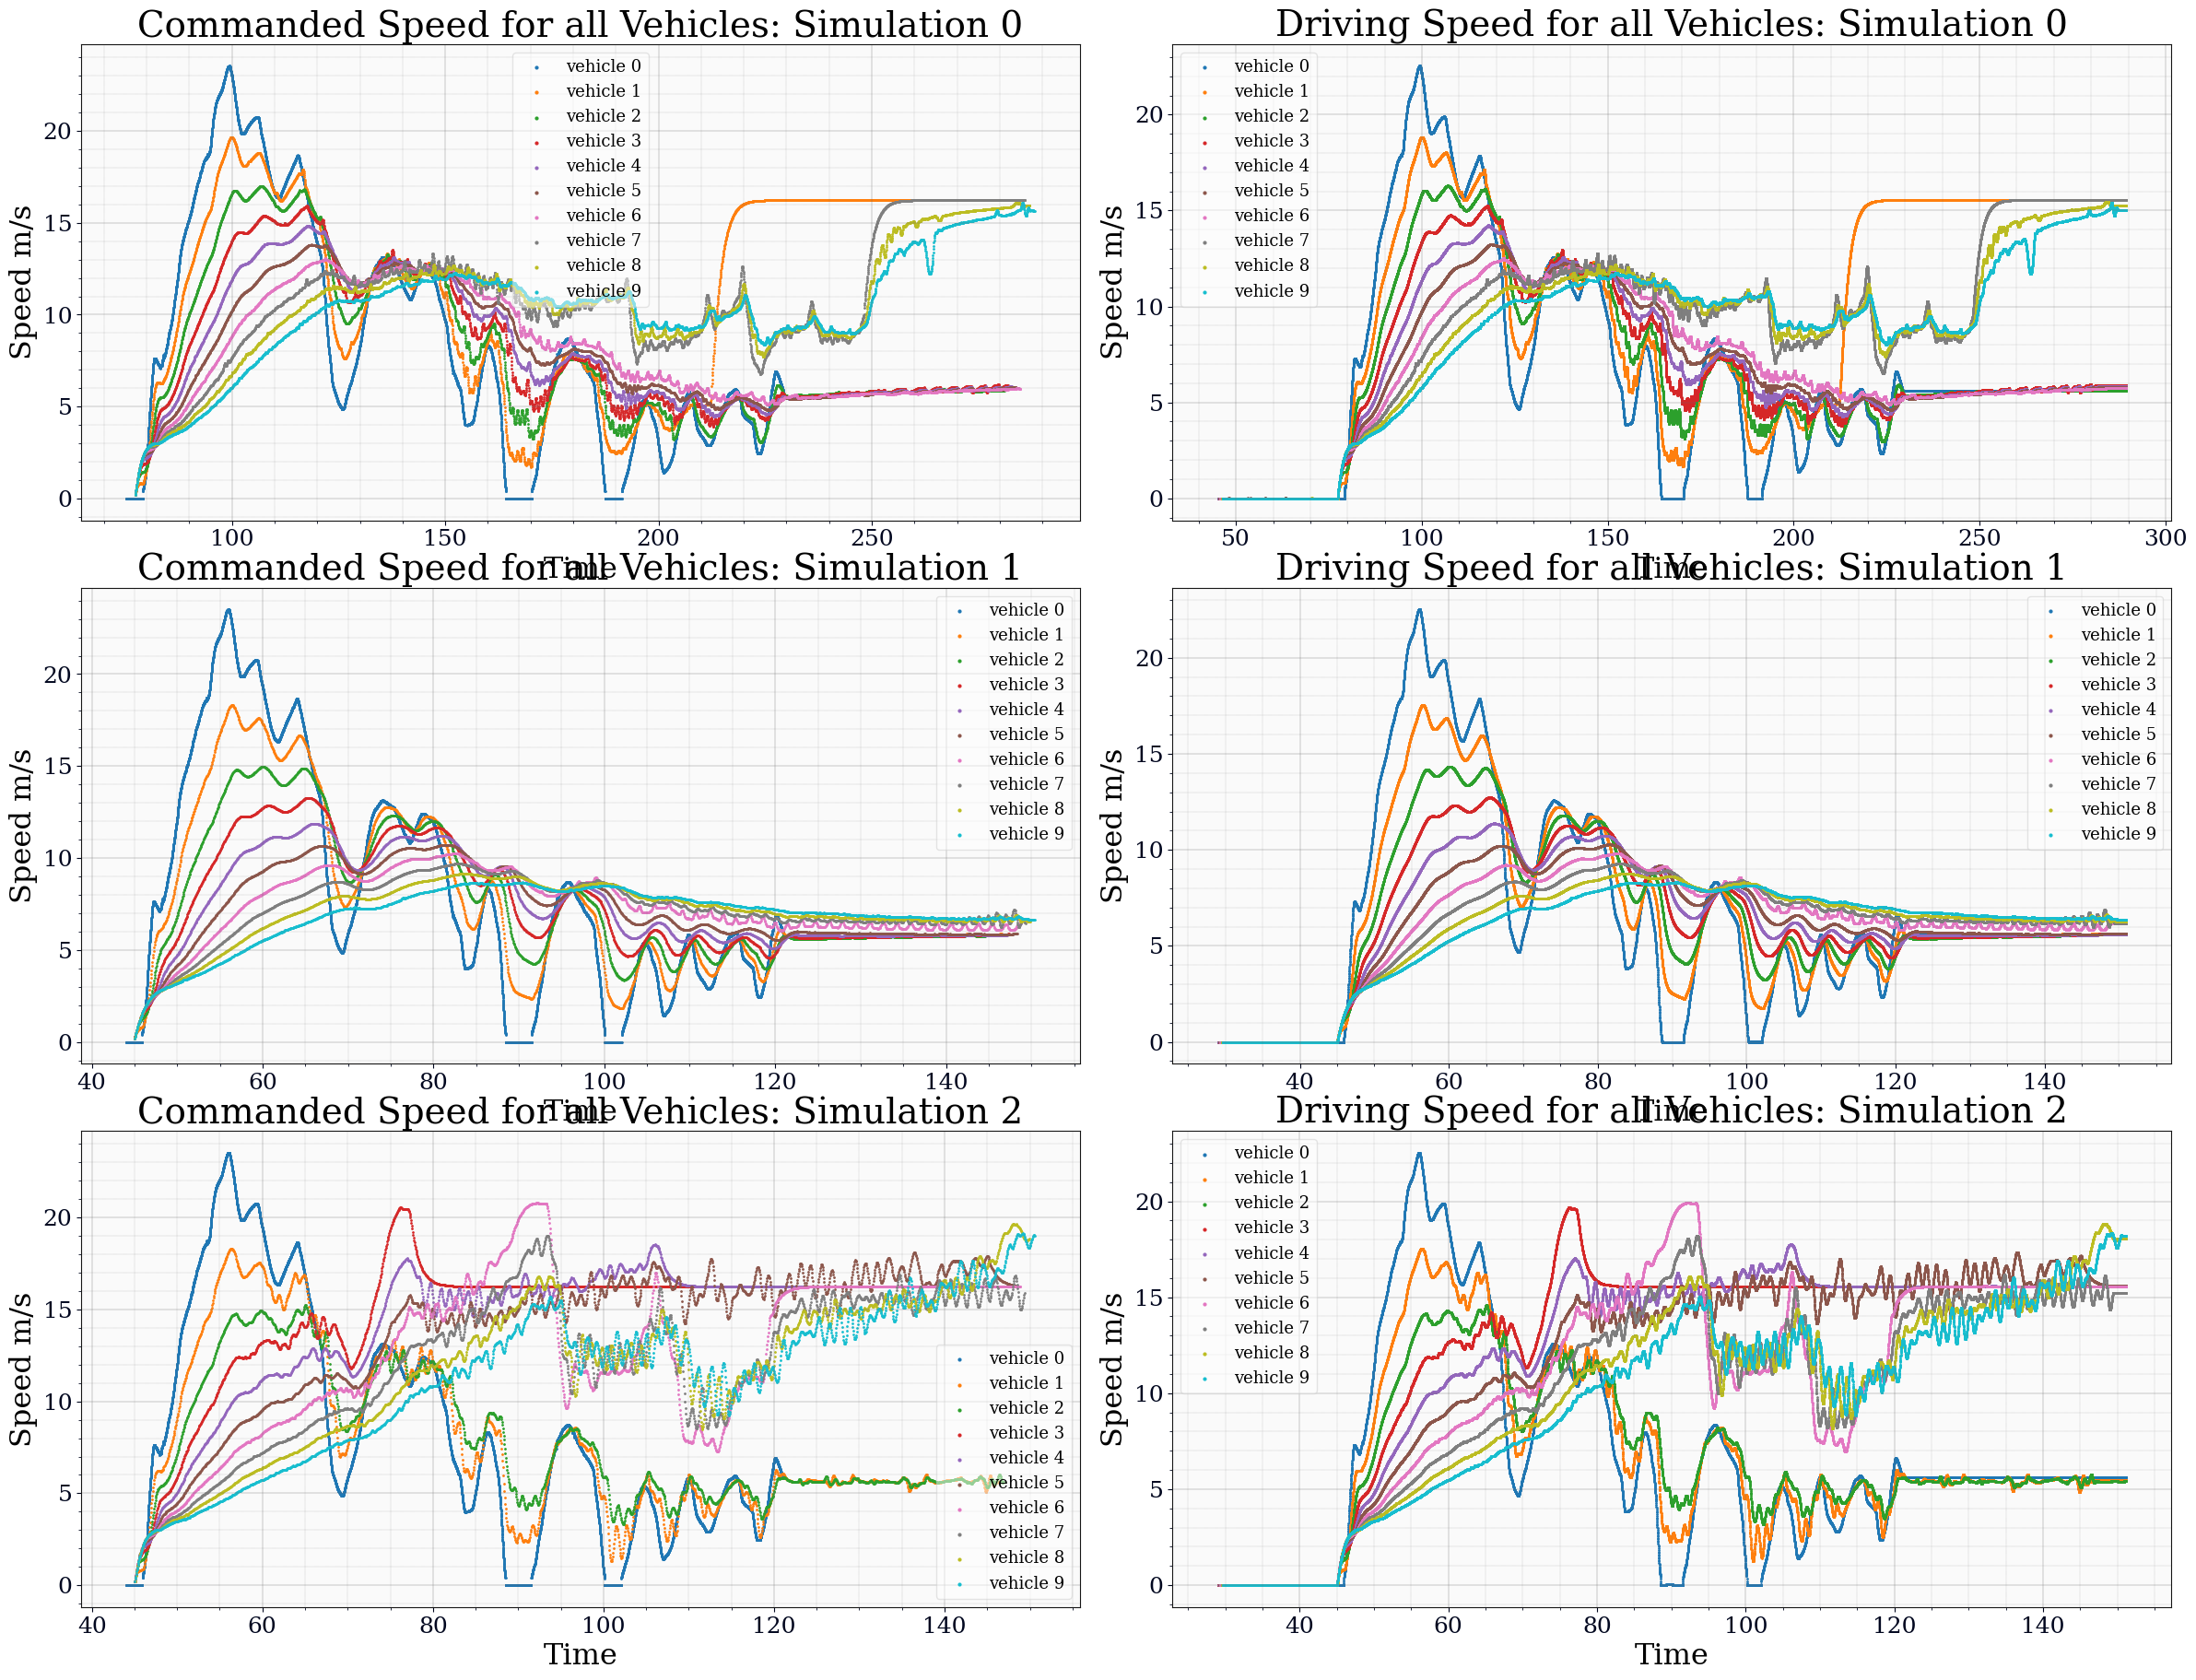

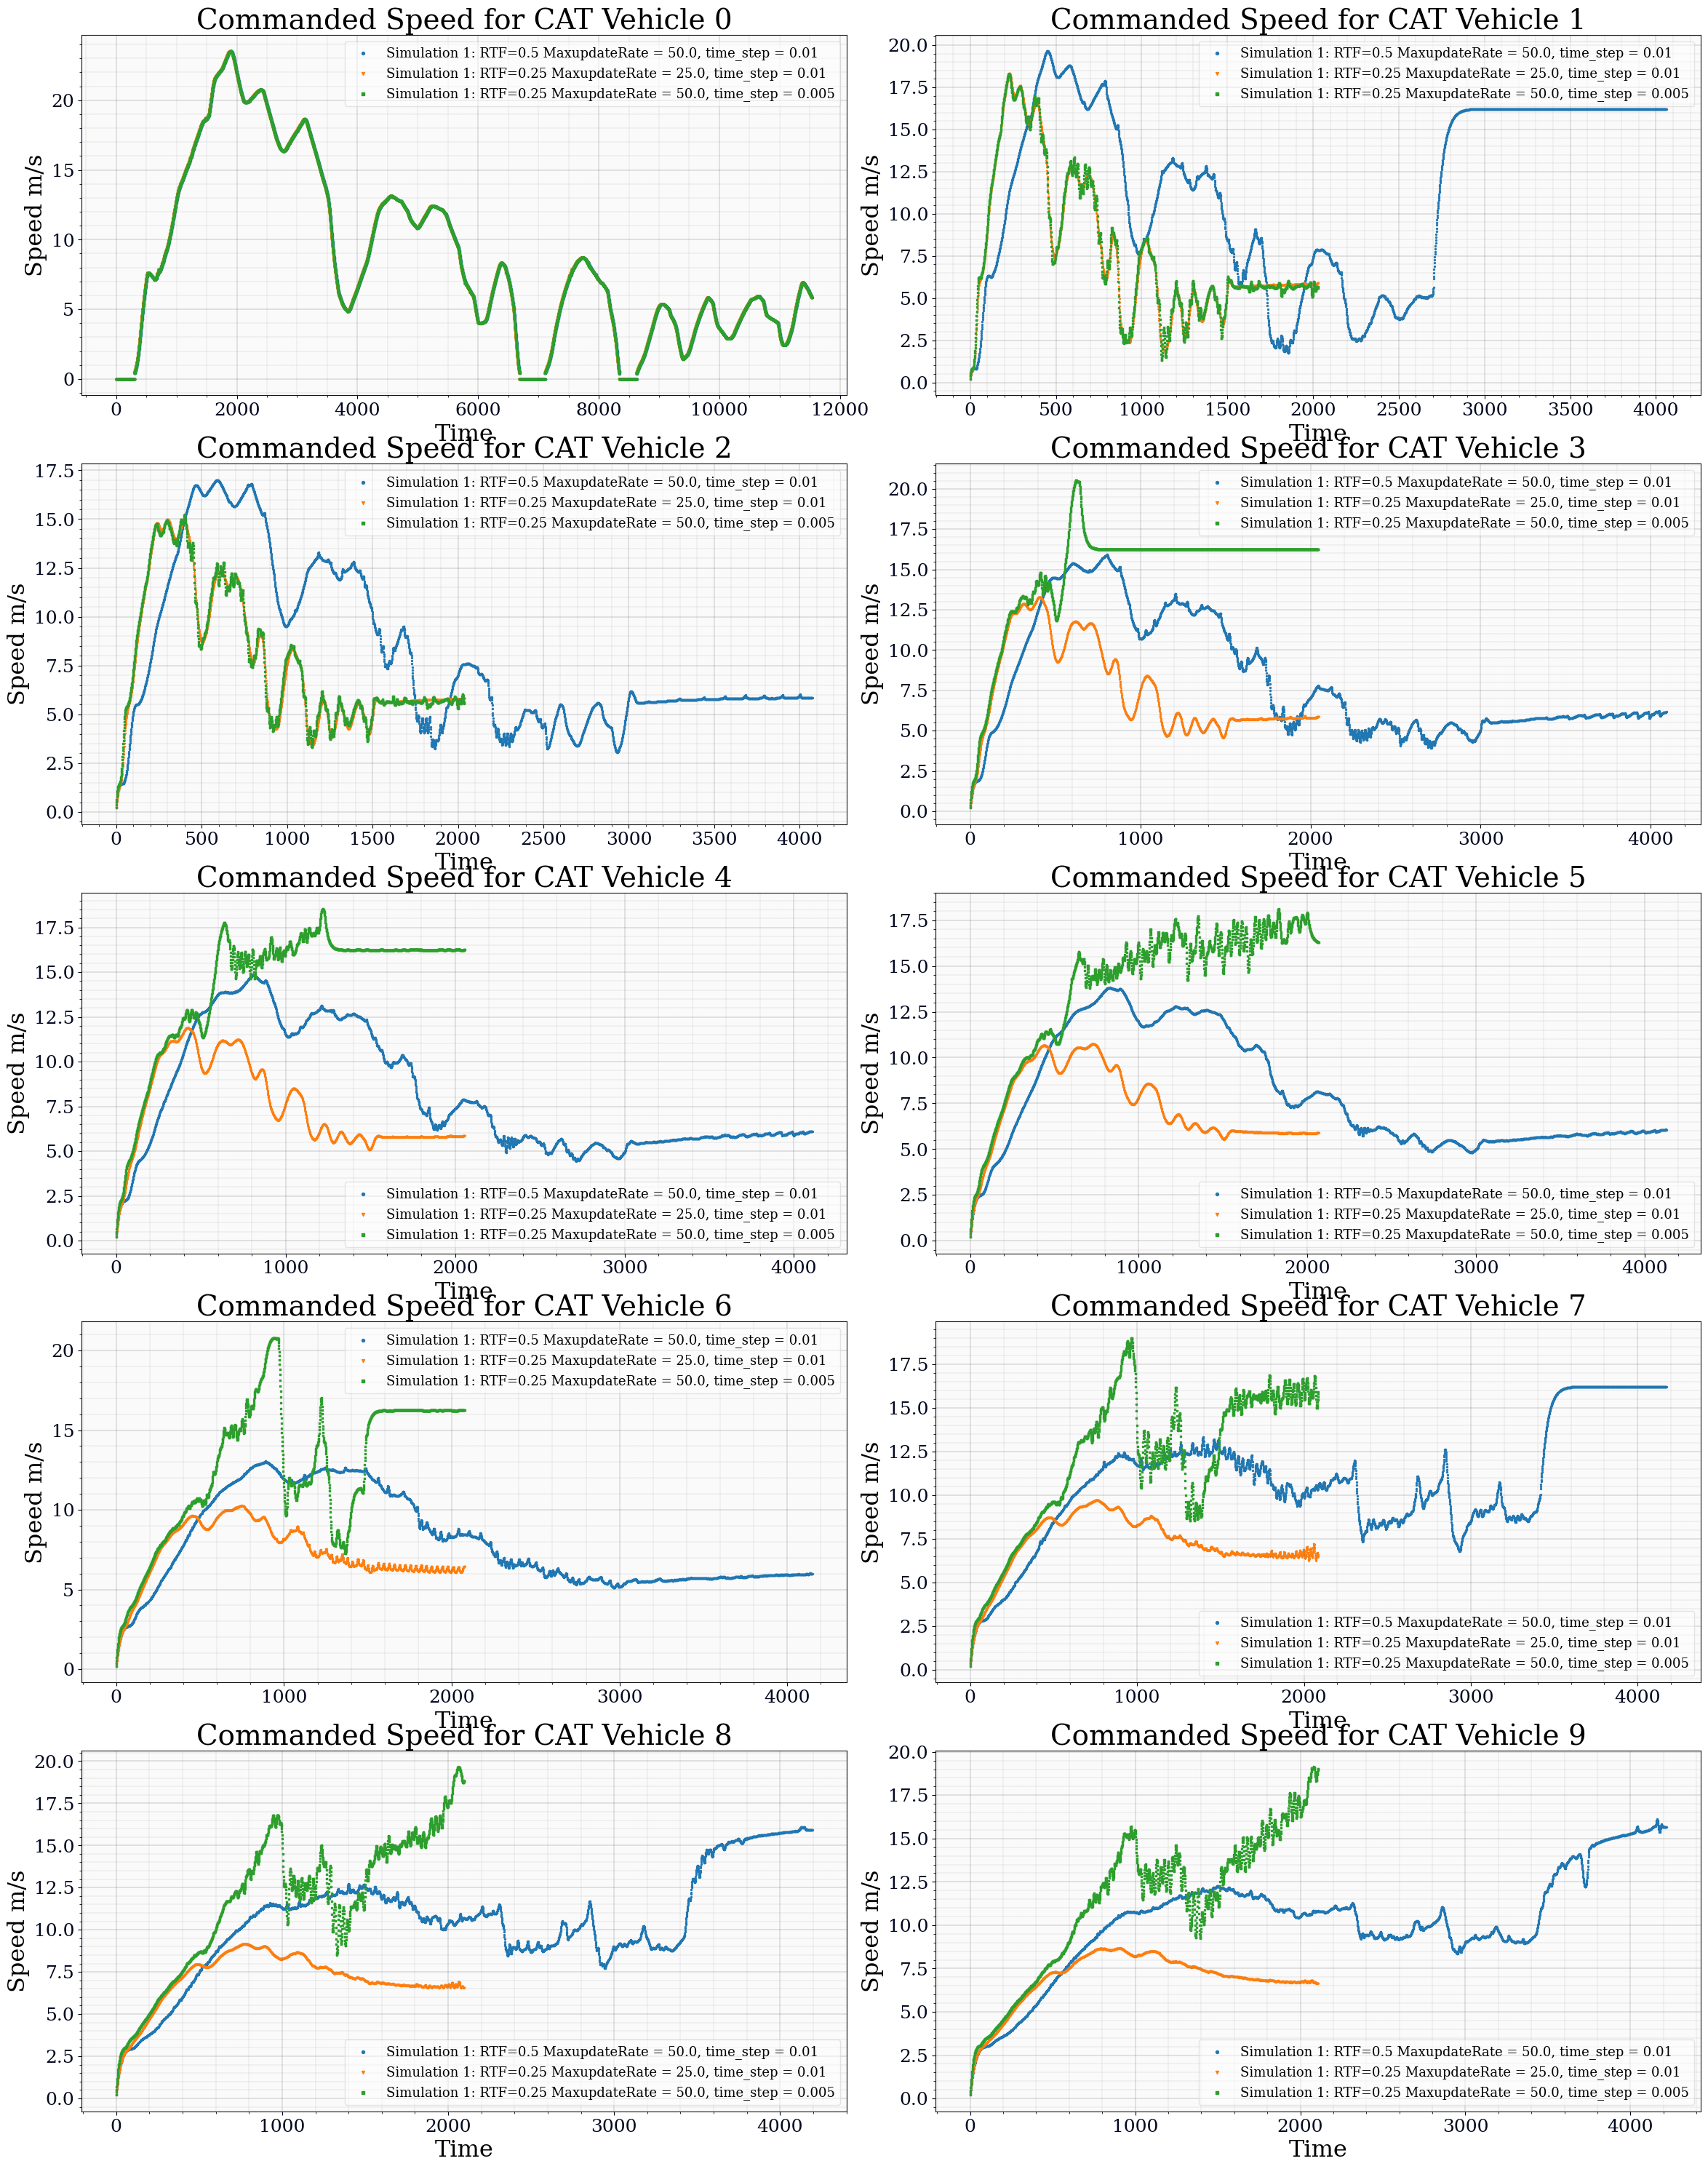

In [7]:
#!/usr/bin/env python

# Author: Rahul Bhadani

import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time

dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')

# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

bagfiles = []
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02.bag')
for bf in bagfiles:
    B = bagreader(bf)
    
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, 10):
            # print(i)
            cmdvel_file = B.message_by_topic('/catvehicle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/catvehicle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/catvehicle_{:03d}/odom'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
            # lead_dist_file = B.message_by_topic('/catvehicle_{:03d}/lead_dist'.format(i))
            # lead_distance = pd.read_csv(lead_dist_file)
            # lead_dist_b.append(lead_distance)
            
            # relvel_file = B.message_by_topic('/catvehicle_{:03d}/rel_vel'.format(i))
            # relvel = pd.read_csv(relvel_file)
            # relvel_b.append(relvel)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(ld):
        ax[j, 2].scatter(x = 'Time', y = 'data', data = ld[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 2].legend()
        ax[j, 2].set_xlabel('Time')
        ax[j, 2].set_ylabel('Space Gap [m]')
        ax[j, 2].set_title('Space Gap: Simulation {}'.format(j))

    for i, v in enumerate(rv):
        ax[j, 3].scatter(x = 'Time', y = 'linear.z', data = rv[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 3].legend()
        ax[j, 3].set_xlabel('Time')
        ax[j, 3].set_ylabel('Relative Velocity [m]')
        ax[j, 3].set_title('Relative Velocity: Simulation {}'.format(j))
        
fig.show()
#fig.savefig("persimulationplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

def scale_time(time_vector, scale = 2.0):
    """
    
    """
    if scale == 1.0:
        return time_vector
    diff = np.diff(time_vector)
    new_time = []
    new_time.append(time_vector[0])

    for i, d in enumerate(diff):
        t_next = new_time[i]  + d*scale
        new_time.append(t_next)

    return new_time

# overlaid plot
fig, ax = bagpy.create_fig(ncols = 2, nrows = 5)

p = [0]    
for k in range(1, len(cmd_speed)):
    p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
    p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    # print('Vehicle: {}'.format(j))
    p = [0, 34.0]
    #scale = [1.0, 2.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    lb = [  'Simulation 1: RTF=0.5 MaxupdateRate = 50.0, time_step = 0.01', \
            'Simulation 1: RTF=0.25 MaxupdateRate = 25.0, time_step = 0.01',\
            'Simulation 1: RTF=0.25 MaxupdateRate = 50.0, time_step = 0.005']
    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        #new_time = scale_time(time, scale[k])
        #cmd_speed[k][j]['Time'] = new_time
        #ax[j].scatter(x = cmd_speed[k][j]['Time'] , y = cmd_speed[k][j]['linear.x']  ,  s = 2, label = 'simulation#_{}'.format(k))
        ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) , y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
    
    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for CAT Vehicle {}'.format(j))
    fig.show()


# fig.savefig("ovelaidplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-22-04-58 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-22-21-11 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-22-33-34 already exists. Not creating.


/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_catvehicle.py:111: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



[2021_10_23_22_47_17] (root) INFO: Zero pass correlation coefficient  = (0.7135755814100984, 0.0)


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.



[2021_10_23_22_51_17] (root) INFO: Zero pass correlation coefficient  = (0.713885642602349, 0.0)


/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

An input array is nearly constant; the computed correlation coefficent may be inaccurate.

/home/refulgent/anaconda3/envs/strym/lib/python3.7/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning:

A

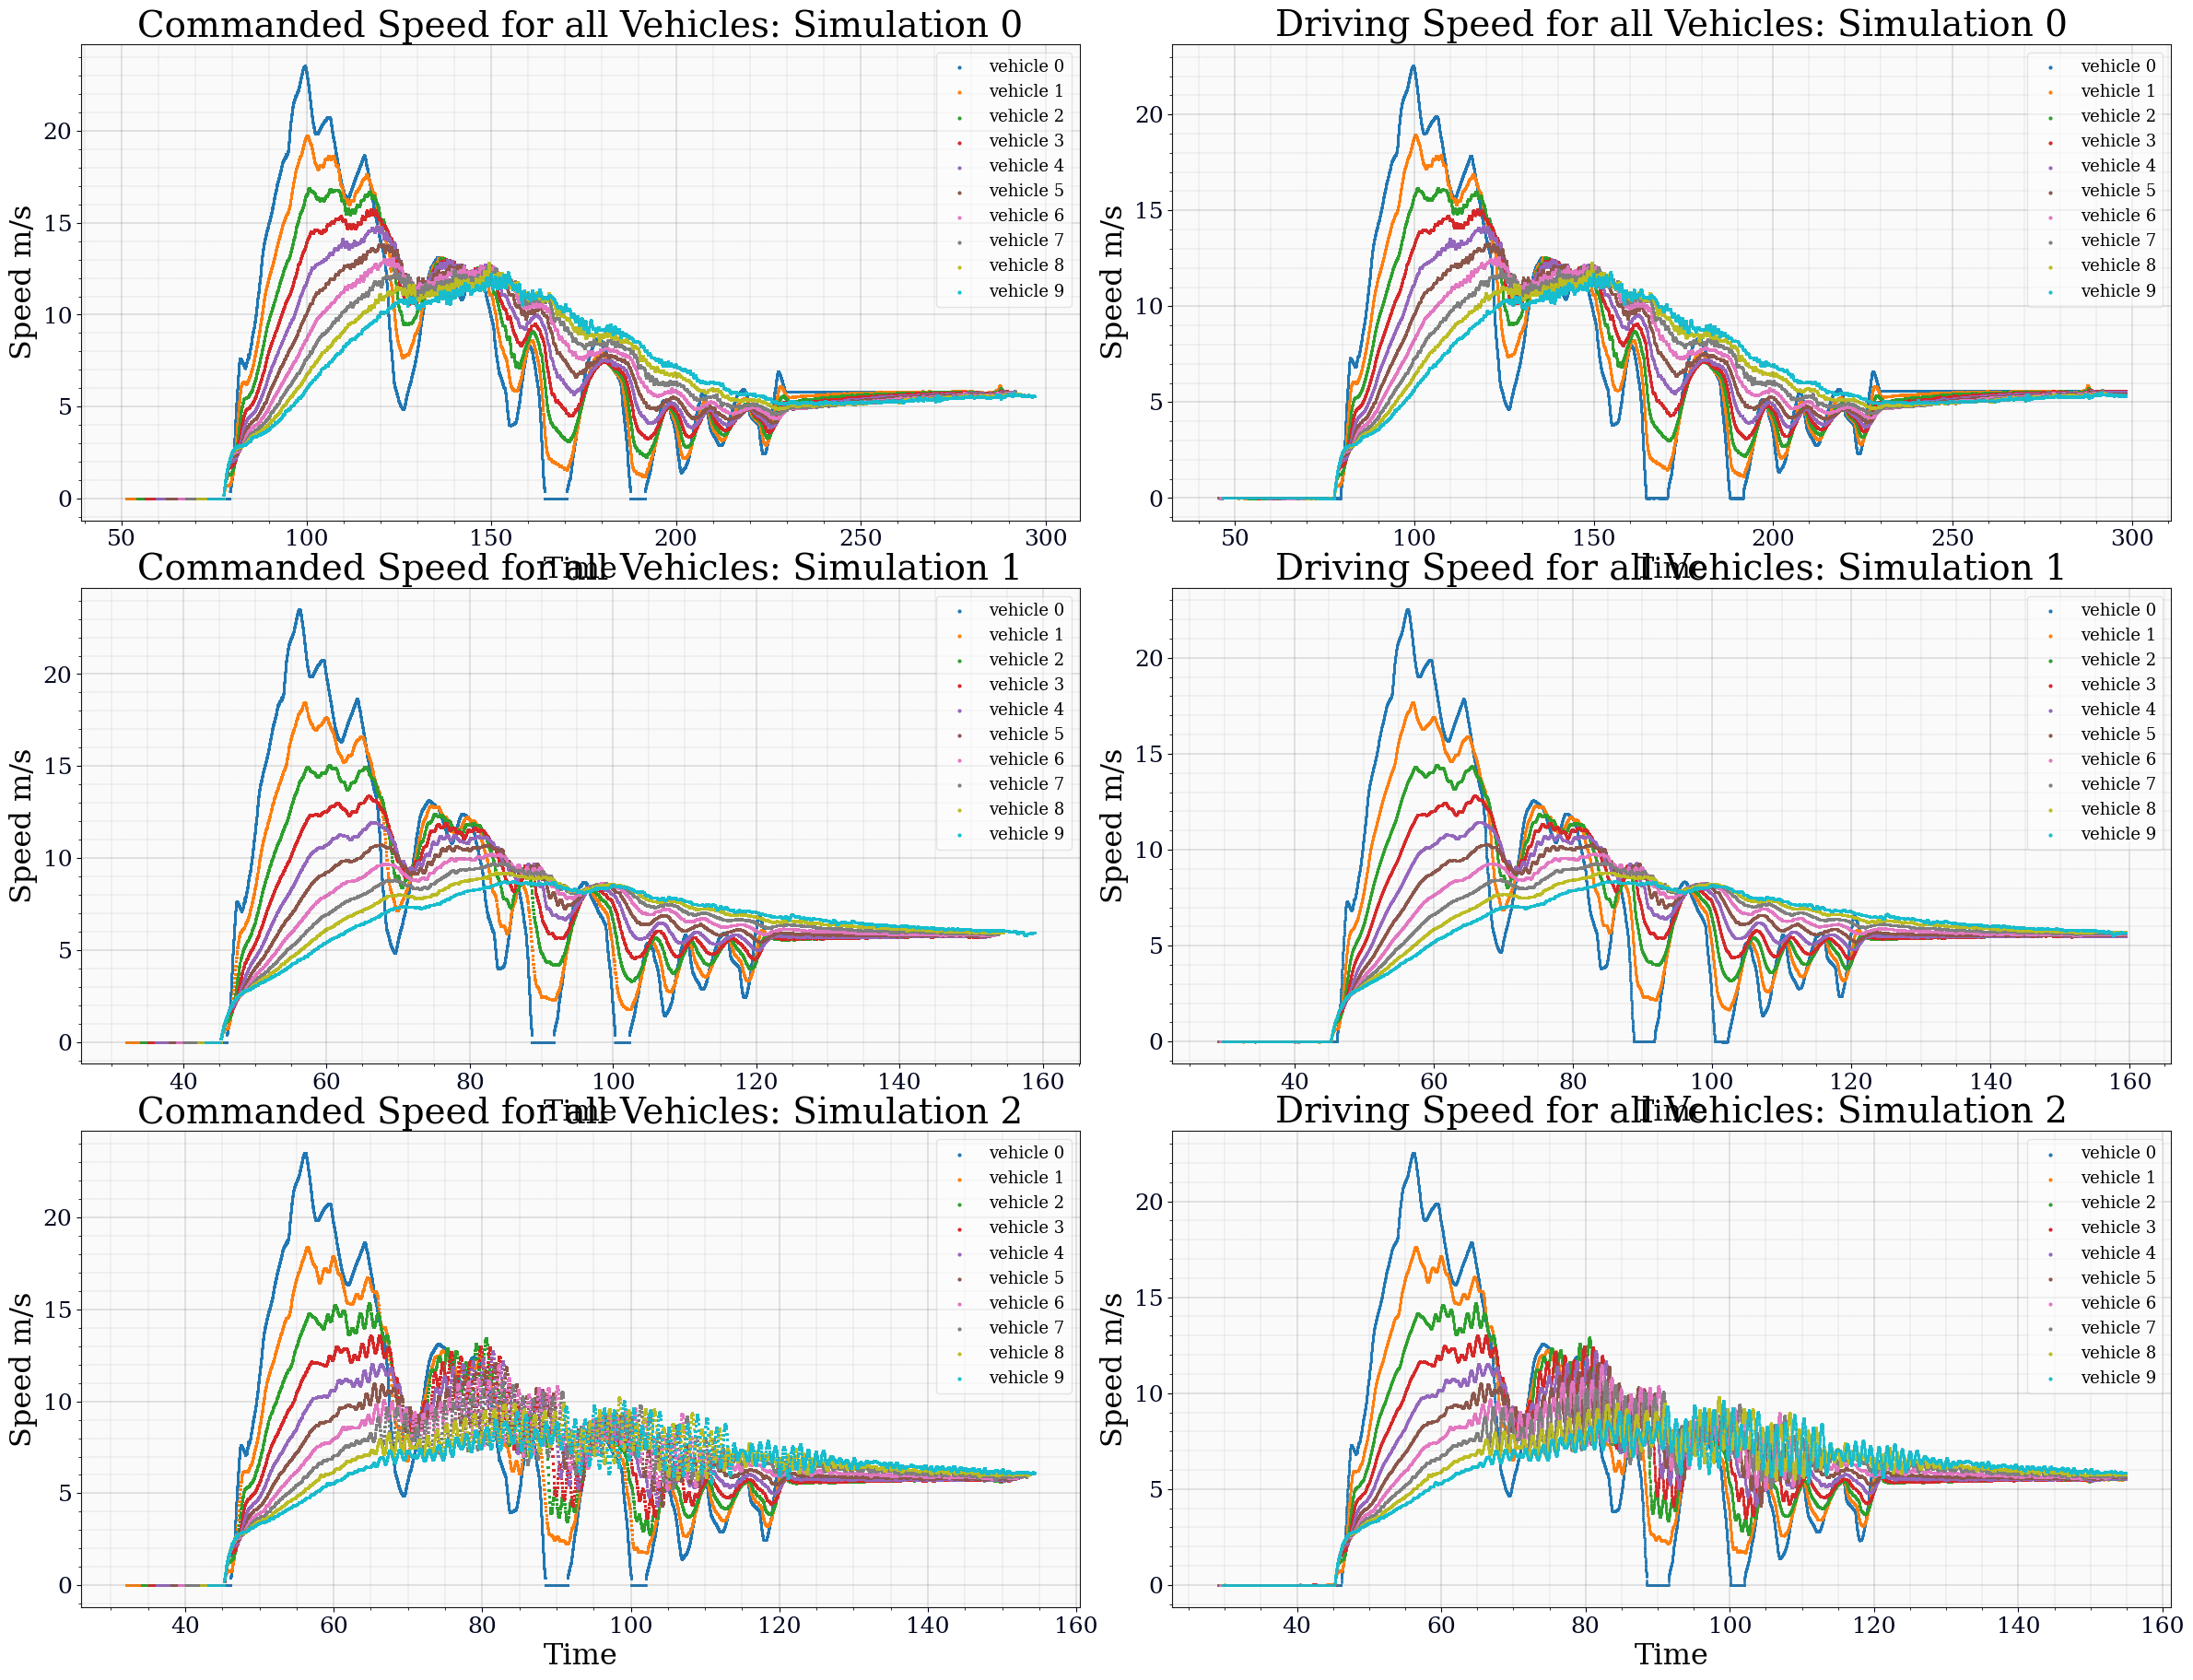

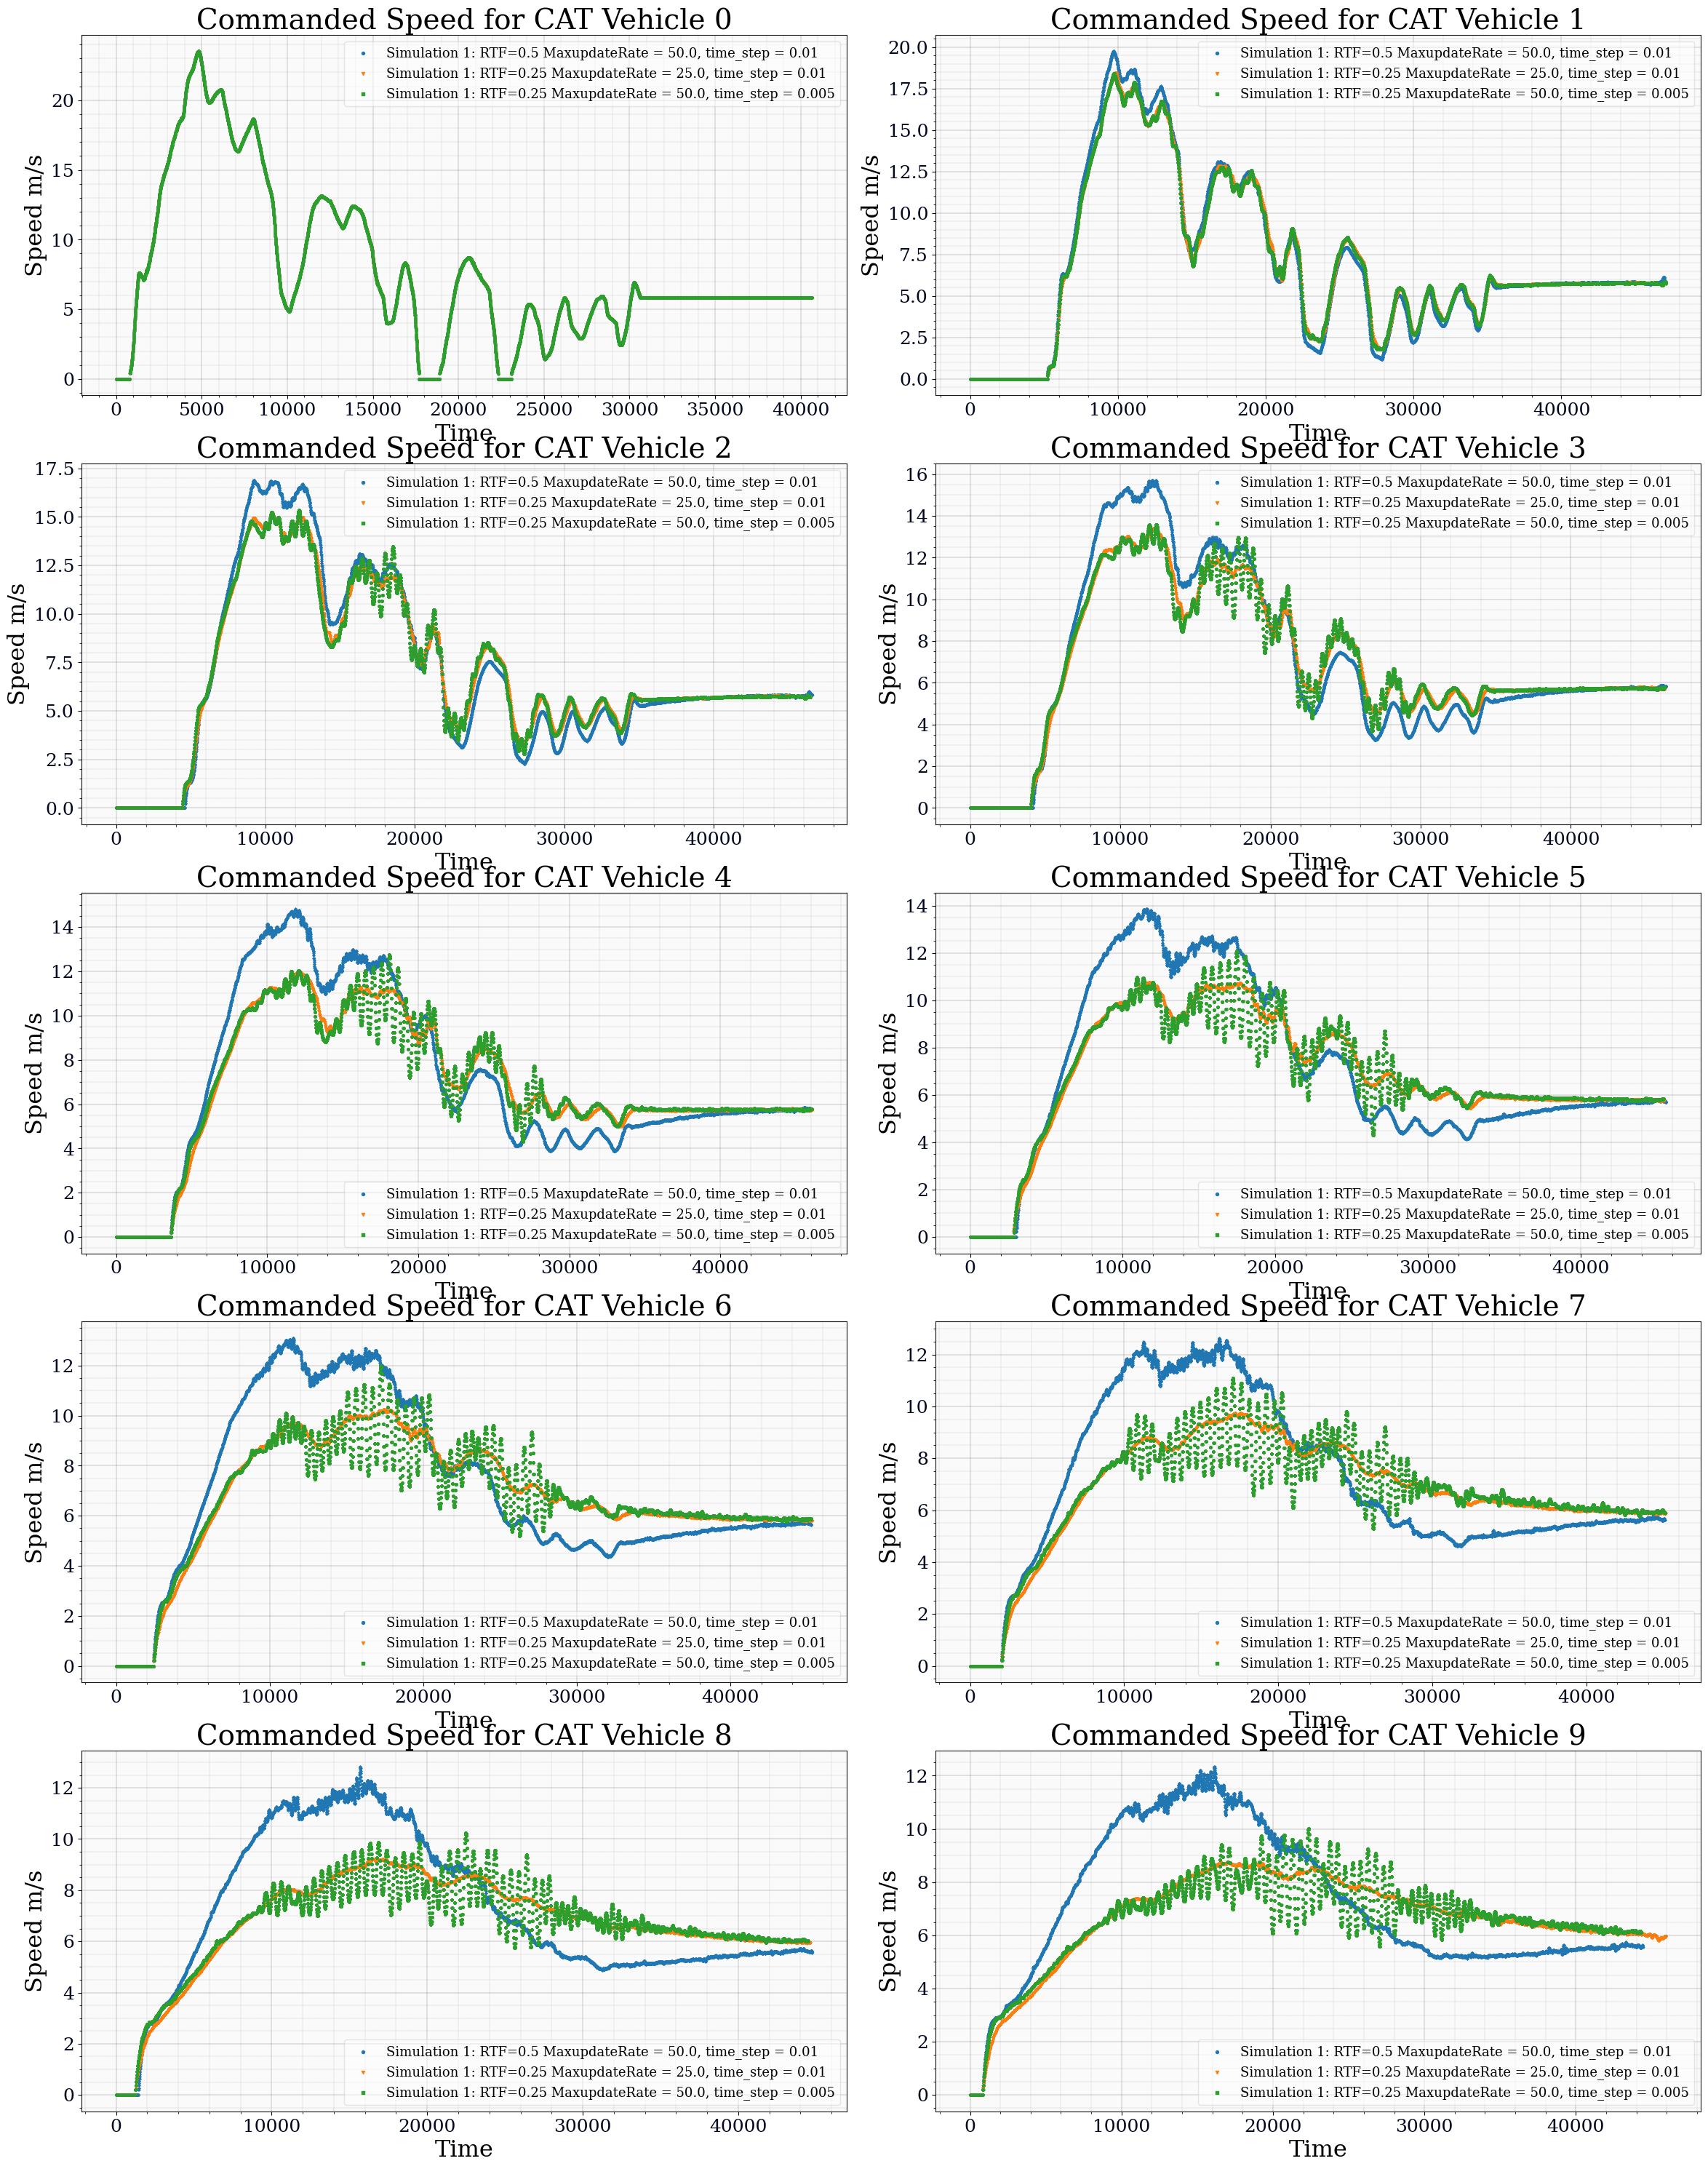

In [8]:
#!/usr/bin/env python

# Author: Rahul Bhadani

import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time

dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')

# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

bagfiles = []
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02.bag')

bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-22-04-58.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-22-21-11.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-22-33-34.bag')


for bf in bagfiles:
    B = bagreader(bf)
    
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, 10):
            # print(i)
            cmdvel_file = B.message_by_topic('/catvehicle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/catvehicle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/catvehicle_{:03d}/odom'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
            # lead_dist_file = B.message_by_topic('/catvehicle_{:03d}/lead_dist'.format(i))
            # lead_distance = pd.read_csv(lead_dist_file)
            # lead_dist_b.append(lead_distance)
            
            # relvel_file = B.message_by_topic('/catvehicle_{:03d}/rel_vel'.format(i))
            # relvel = pd.read_csv(relvel_file)
            # relvel_b.append(relvel)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(ld):
        ax[j, 2].scatter(x = 'Time', y = 'data', data = ld[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 2].legend()
        ax[j, 2].set_xlabel('Time')
        ax[j, 2].set_ylabel('Space Gap [m]')
        ax[j, 2].set_title('Space Gap: Simulation {}'.format(j))

    for i, v in enumerate(rv):
        ax[j, 3].scatter(x = 'Time', y = 'linear.z', data = rv[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 3].legend()
        ax[j, 3].set_xlabel('Time')
        ax[j, 3].set_ylabel('Relative Velocity [m]')
        ax[j, 3].set_title('Relative Velocity: Simulation {}'.format(j))
        
fig.show()
#fig.savefig("persimulationplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

def scale_time(time_vector, scale = 2.0):
    """
    
    """
    if scale == 1.0:
        return time_vector
    diff = np.diff(time_vector)
    new_time = []
    new_time.append(time_vector[0])

    for i, d in enumerate(diff):
        t_next = new_time[i]  + d*scale
        new_time.append(t_next)

    return new_time

# overlaid plot
fig, ax = bagpy.create_fig(ncols = 2, nrows = 5)

p = [0]    
for k in range(1, len(cmd_speed)):
    p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
    p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    # print('Vehicle: {}'.format(j))
    p = [0, 34.0]
    #scale = [1.0, 2.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    lb = [  'Simulation 1: RTF=0.5 MaxupdateRate = 50.0, time_step = 0.01', \
            'Simulation 1: RTF=0.25 MaxupdateRate = 25.0, time_step = 0.01',\
            'Simulation 1: RTF=0.25 MaxupdateRate = 50.0, time_step = 0.005']
    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        #new_time = scale_time(time, scale[k])
        #cmd_speed[k][j]['Time'] = new_time
        #ax[j].scatter(x = cmd_speed[k][j]['Time'] , y = cmd_speed[k][j]['linear.x']  ,  s = 2, label = 'simulation#_{}'.format(k))
        ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) , y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
    
    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for CAT Vehicle {}'.format(j))
    fig.show()


# fig.savefig("ovelaidplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-23-49-54 already exists. Not creating.
[INFO]  Data folder /home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-24-00-01-25 already exists. Not creating.


/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_catvehicle.py:117: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.

/home/refulgent/VersionControl/sparkle_python/notebooks/RTF_Analysis_catvehicle.py:166: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



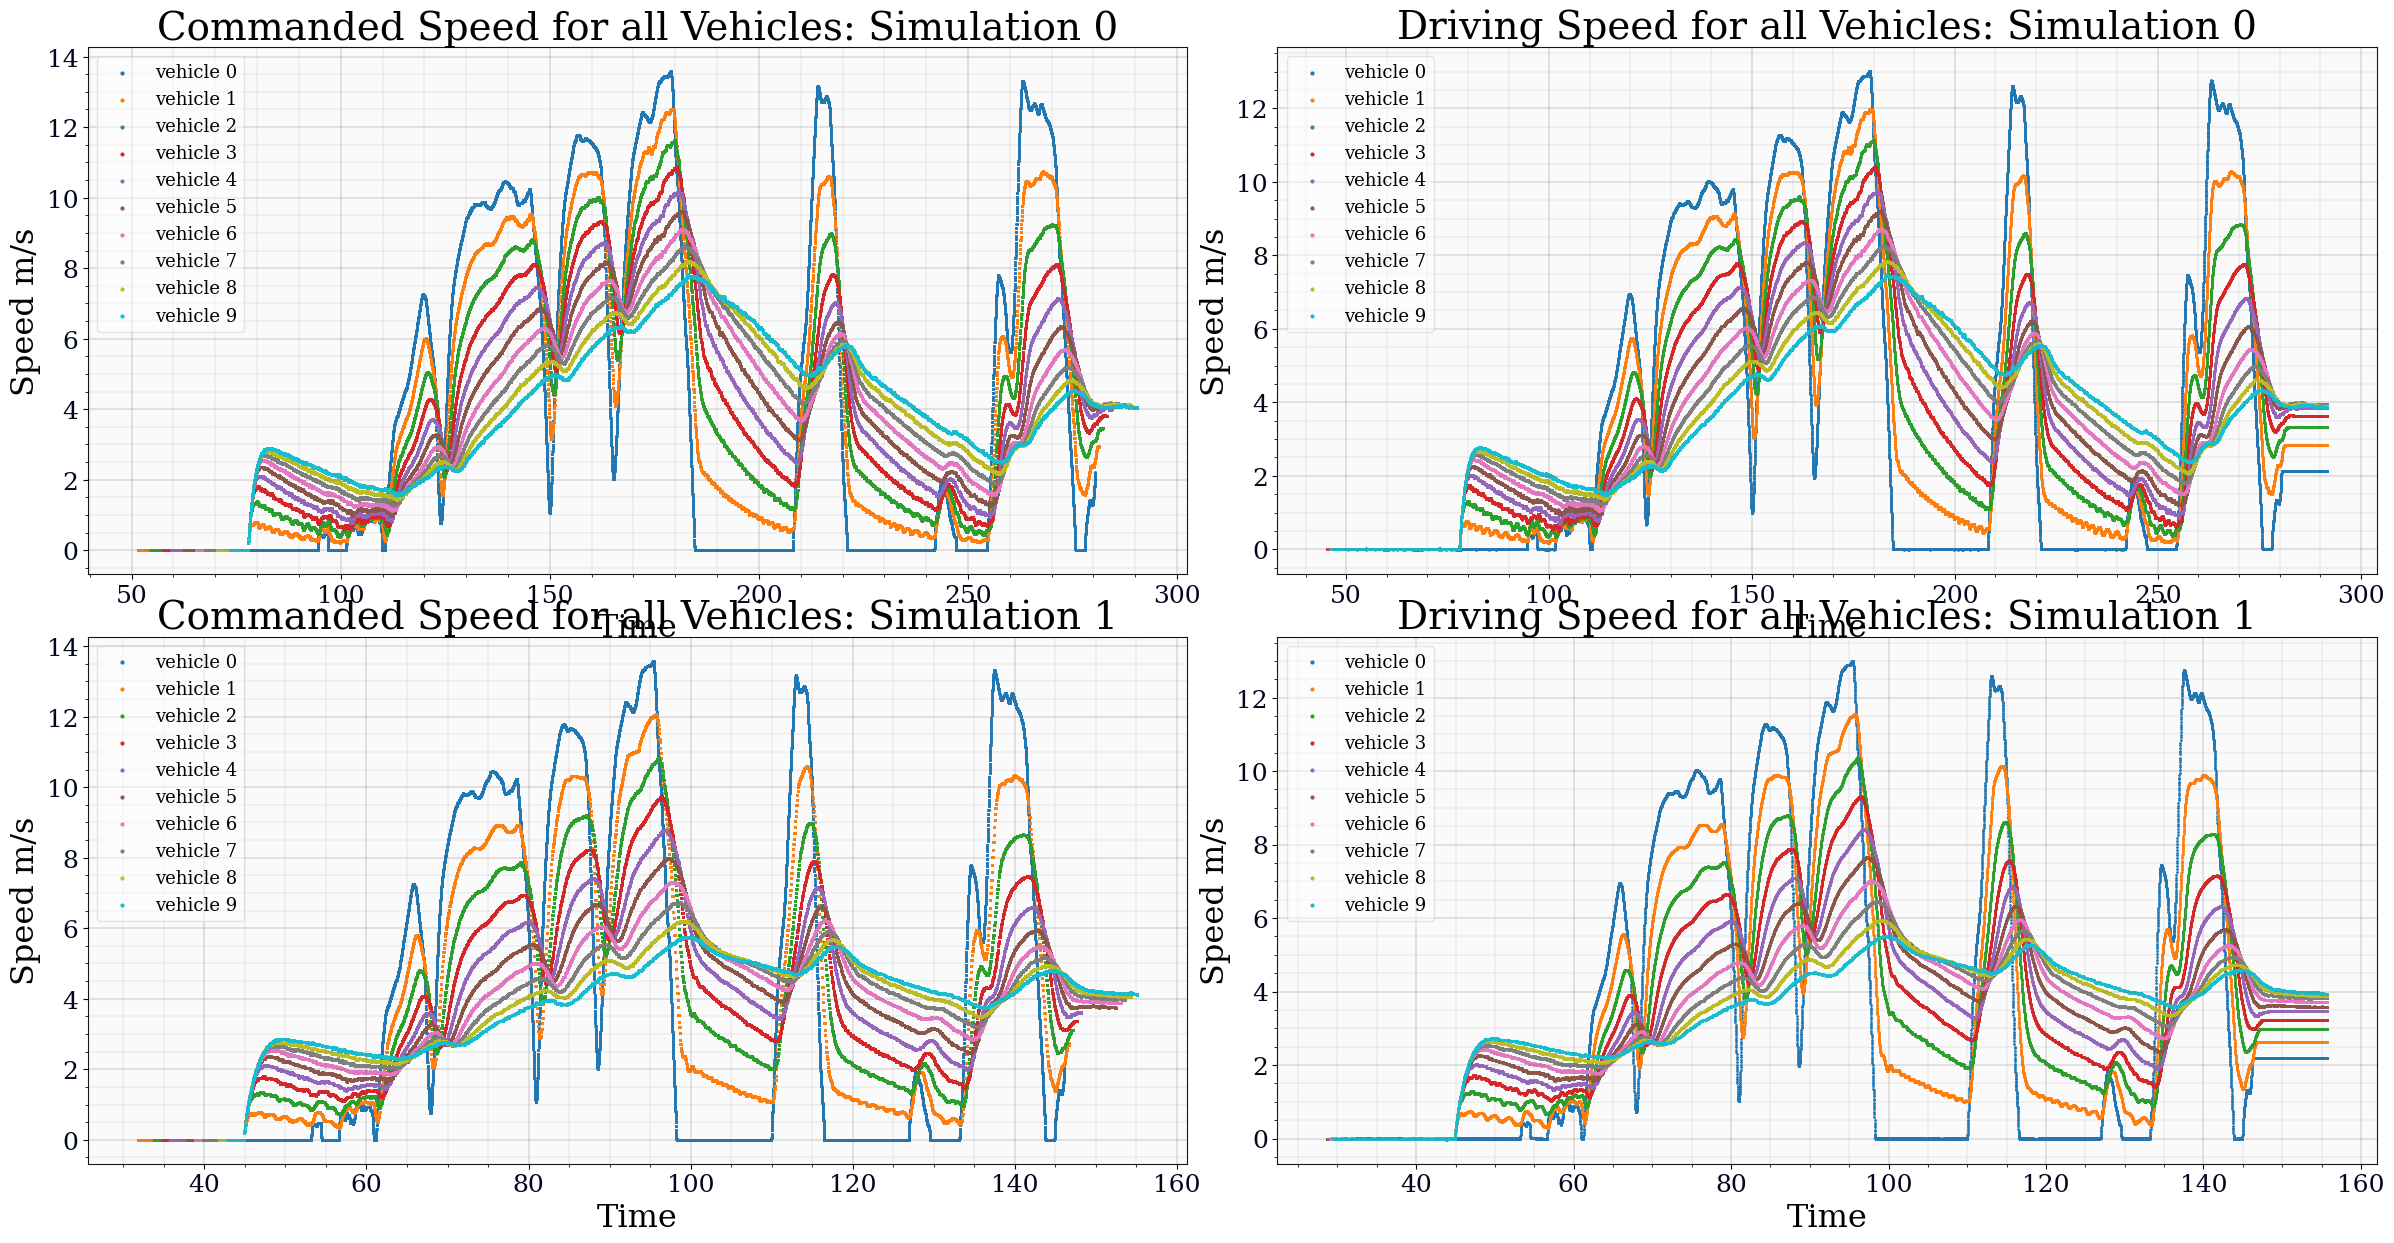

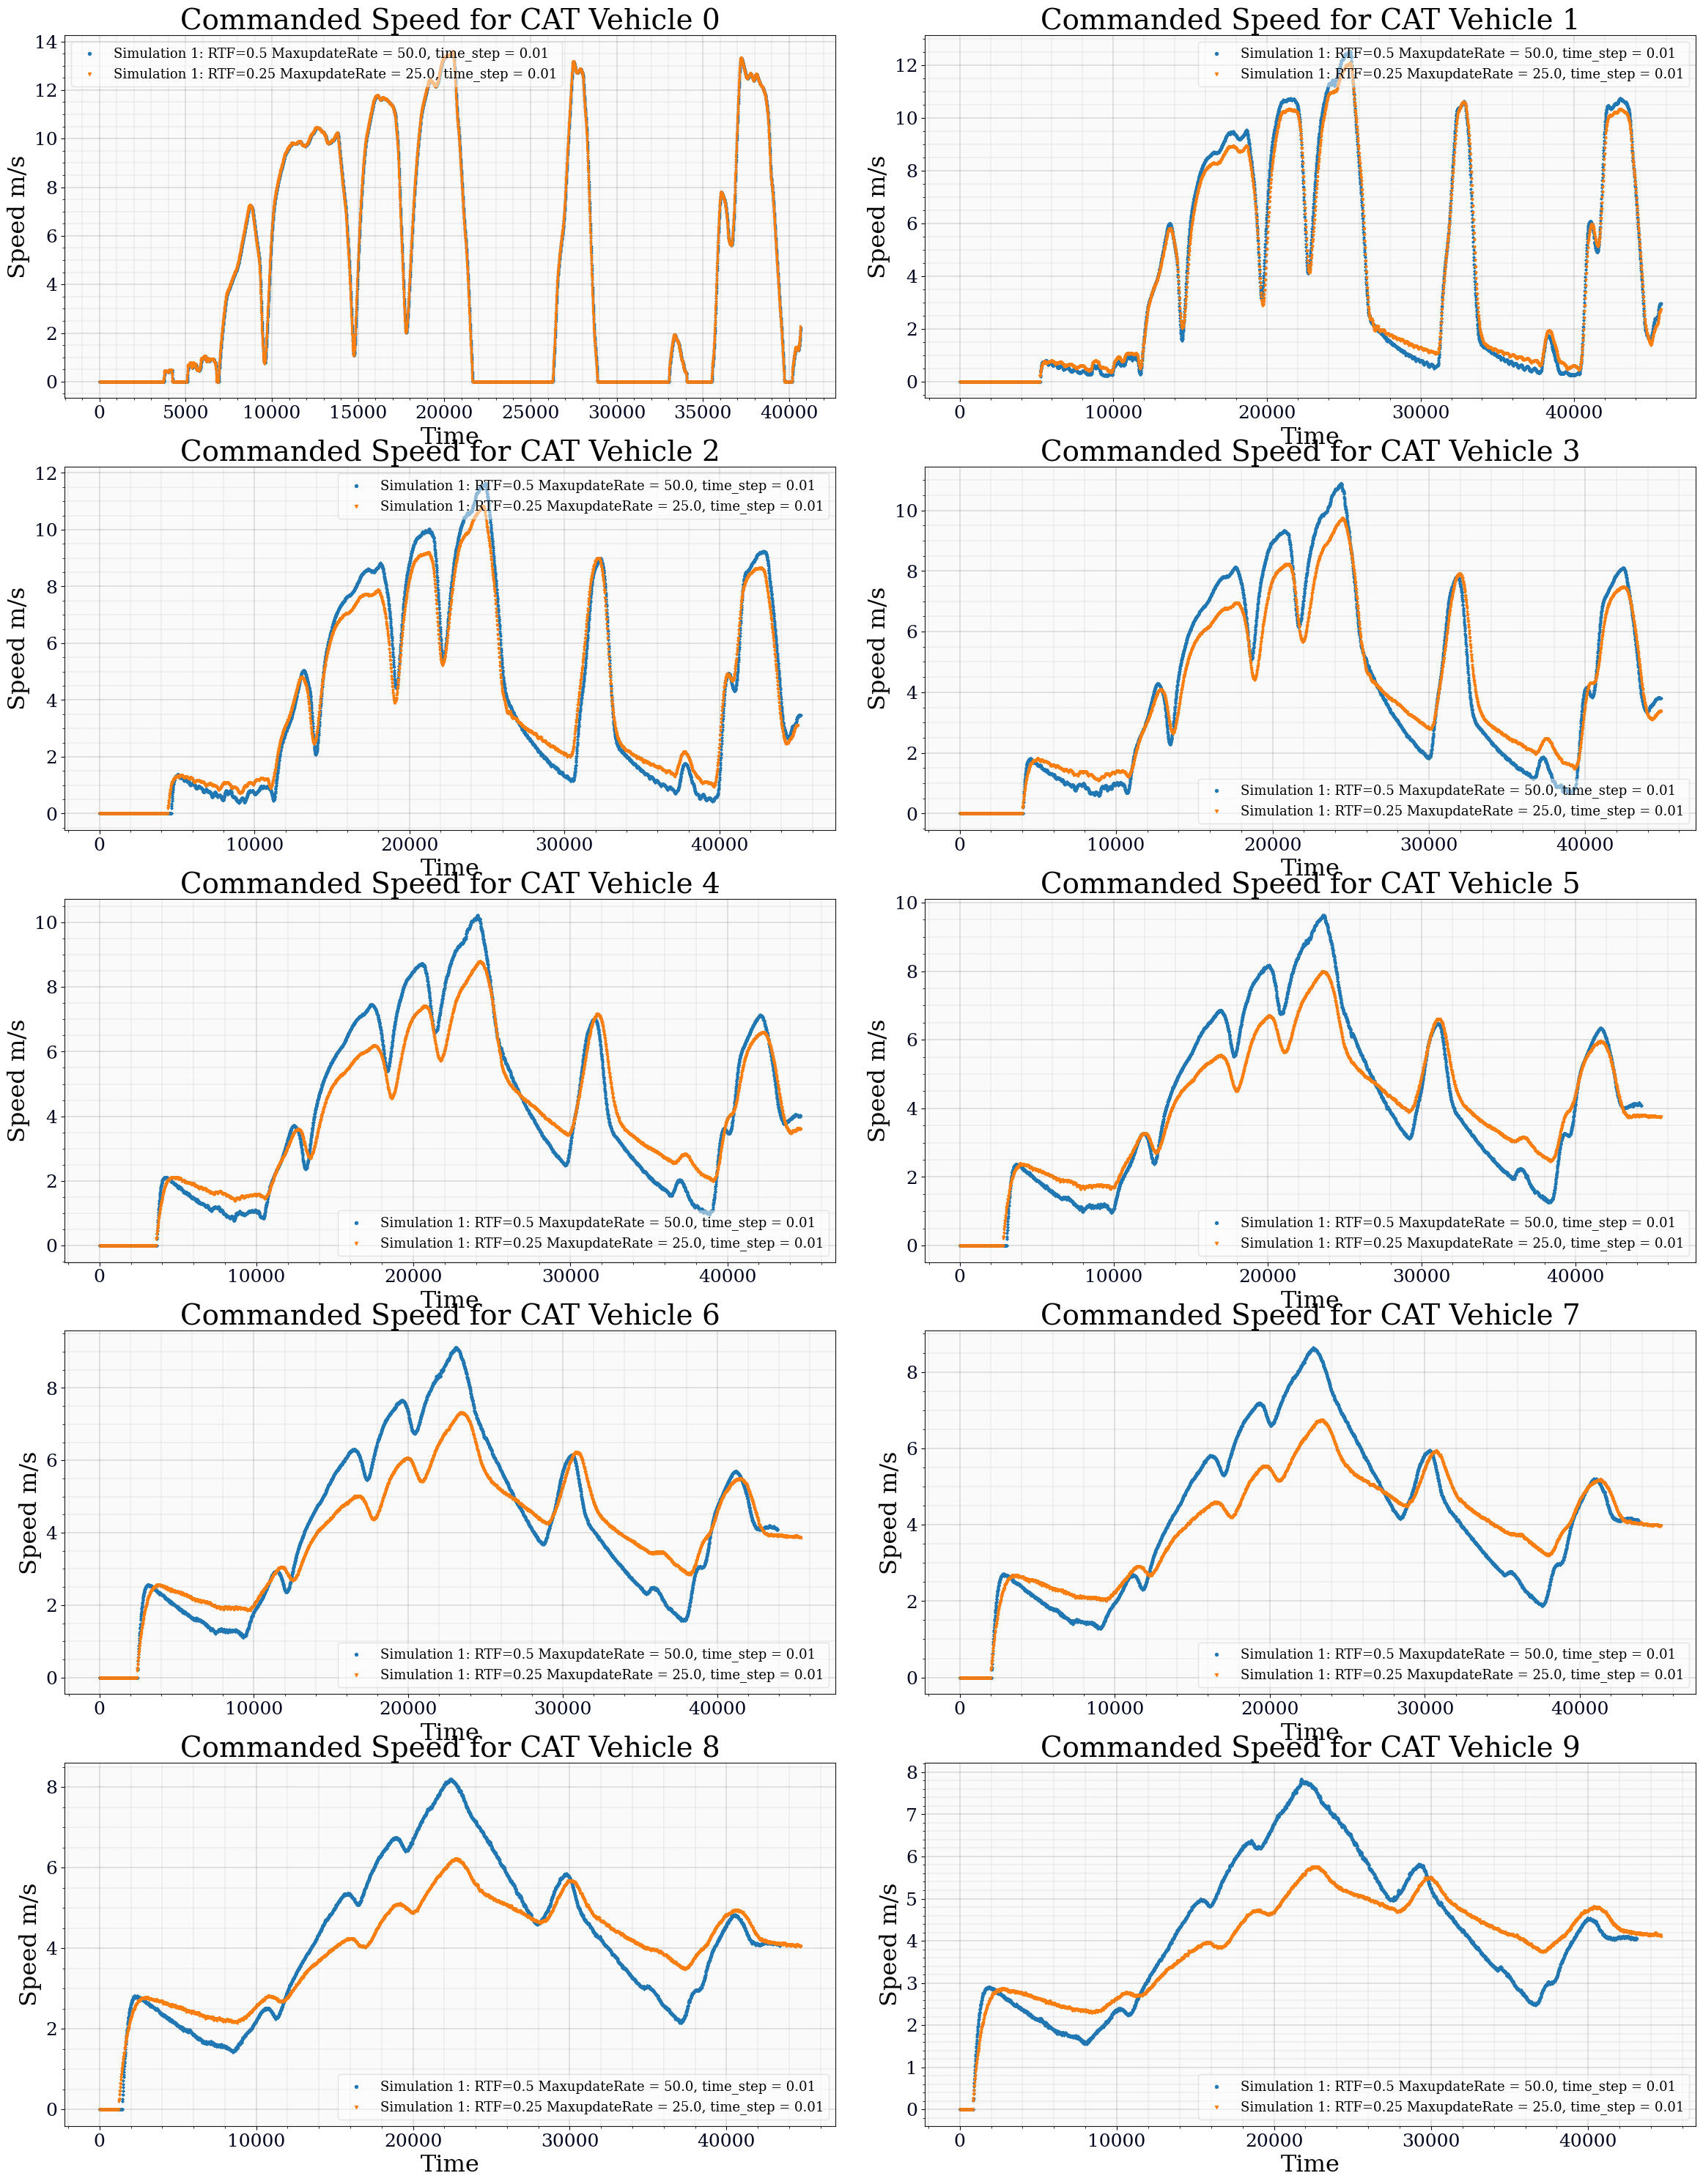

In [9]:
#!/usr/bin/env python

# Author: Rahul Bhadani

import sparkle
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import bagpy
from bagpy import bagreader
from strym import strymread
import datetime
import time

dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')

# Analysis
cmd_speed =[]
speed = []
posX = []
lead_dist = []
rel_vel = []

bagfiles = []
## without hofffman
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-20-43-42.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-21-00-08.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-21-17-02.bag')

## with hoffman
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-22-04-58.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-23-22-21-11.bag')
# bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.005_recordtime_400.0_2021-10-23-22-33-34.bag')

## with hoffman - leadervel comes from MATLAB code-generared ROS node
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_50.0_time_step_0.01_recordtime_400.0_2021-10-23-23-49-54.bag')
bagfiles.append('/home/refulgent/Cyverse/sparkle/catvehicle_n_10_max_update_rate_25.0_time_step_0.01_recordtime_400.0_2021-10-24-00-01-25.bag')


for bf in bagfiles:
    B = bagreader(bf)
    
    cmd_speed_b = []
    speed_b = []
    odom_b = []
    lead_dist_b = []
    relvel_b = []
    for i in range(0, 10):
            # print(i)
            cmdvel_file = B.message_by_topic('/catvehicle_{:03d}/cmd_vel'.format(i))
            cmdvel = pd.read_csv(cmdvel_file)
            cmd_speed_b.append(cmdvel)
            
            vel_file = B.message_by_topic('/catvehicle_{:03d}/vel'.format(i))
            vel = pd.read_csv(vel_file)
            speed_b.append(vel)
            
            odom_file = B.message_by_topic('/catvehicle_{:03d}/odom'.format(i))
            odom = pd.read_csv(odom_file)
            odom_b.append(odom)
            
            # lead_dist_file = B.message_by_topic('/catvehicle_{:03d}/lead_dist'.format(i))
            # lead_distance = pd.read_csv(lead_dist_file)
            # lead_dist_b.append(lead_distance)
            
            # relvel_file = B.message_by_topic('/catvehicle_{:03d}/rel_vel'.format(i))
            # relvel = pd.read_csv(relvel_file)
            # relvel_b.append(relvel)
            
    cmd_speed.append(cmd_speed_b)
    speed.append(speed_b)
    posX.append(odom_b)
    lead_dist.append(lead_dist_b)
    rel_vel.append(relvel_b)


# per simuation plot
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {}'.format(j))

    for i, v in enumerate(ld):
        ax[j, 2].scatter(x = 'Time', y = 'data', data = ld[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 2].legend()
        ax[j, 2].set_xlabel('Time')
        ax[j, 2].set_ylabel('Space Gap [m]')
        ax[j, 2].set_title('Space Gap: Simulation {}'.format(j))

    for i, v in enumerate(rv):
        ax[j, 3].scatter(x = 'Time', y = 'linear.z', data = rv[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 3].legend()
        ax[j, 3].set_xlabel('Time')
        ax[j, 3].set_ylabel('Relative Velocity [m]')
        ax[j, 3].set_title('Relative Velocity: Simulation {}'.format(j))
        
fig.show()
#fig.savefig("persimulationplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')

def scale_time(time_vector, scale = 2.0):
    """
    
    """
    if scale == 1.0:
        return time_vector
    diff = np.diff(time_vector)
    new_time = []
    new_time.append(time_vector[0])

    for i, d in enumerate(diff):
        t_next = new_time[i]  + d*scale
        new_time.append(t_next)

    return new_time

# overlaid plot
fig, ax = bagpy.create_fig(ncols = 2, nrows = 5)

p = [0]    
# for k in range(1, len(cmd_speed)):
#     p1 = strymread.time_shift(df1=cmd_speed[0][0], df2=cmd_speed[k][0], msg_col1 = 'linear.x', msg_col2='linear.x')
#     p.append(p1)

for j in range(0, len(cmd_speed[0])):
    
    # print('Vehicle: {}'.format(j))
    p = [0, 34.0]
    #scale = [1.0, 2.0]
    marker = ["o", "v", "s"]
    s= [2.0, 2.0, 2.0]
    lb = [  'Simulation 1: RTF=0.5 MaxupdateRate = 50.0, time_step = 0.01', \
            'Simulation 1: RTF=0.25 MaxupdateRate = 25.0, time_step = 0.01',\
            'Simulation 1: RTF=0.25 MaxupdateRate = 50.0, time_step = 0.005']
    for k in range(0, len(cmd_speed)):

        time = cmd_speed[k][j]['Time'].tolist()
        #new_time = scale_time(time, scale[k])
        #cmd_speed[k][j]['Time'] = new_time
        #ax[j].scatter(x = cmd_speed[k][j]['Time'] , y = cmd_speed[k][j]['linear.x']  ,  s = 2, label = 'simulation#_{}'.format(k))
        ax[j].scatter(x= np.arange(0, cmd_speed[k][j].shape[0]) , y = cmd_speed[k][j]['linear.x']  ,  s = s[k], label = lb[k], marker =marker[k])
    
    ax[j].legend()
    ax[j].set_xlabel('Time')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for CAT Vehicle {}'.format(j))
    fig.show()


# fig.savefig("ovelaidplots_RTFhalf_vs_quarter_{}.png".format(dt), dpi = 100, bbox_inches='tight')